In [1]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage, misc
from matplotlib.colors import ListedColormap

image = Image.open('Data/figures.jpg')

In [2]:
a, b = image.size
print('weight =',a,' height =',b)

weight = 285  height = 177


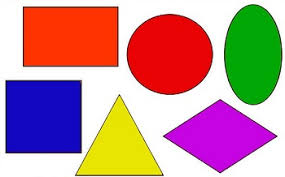

In [3]:
image

In [4]:
type(image.getchannel('R'))

PIL.Image.Image

In [5]:
image_draw = ImageDraw.Draw(image)

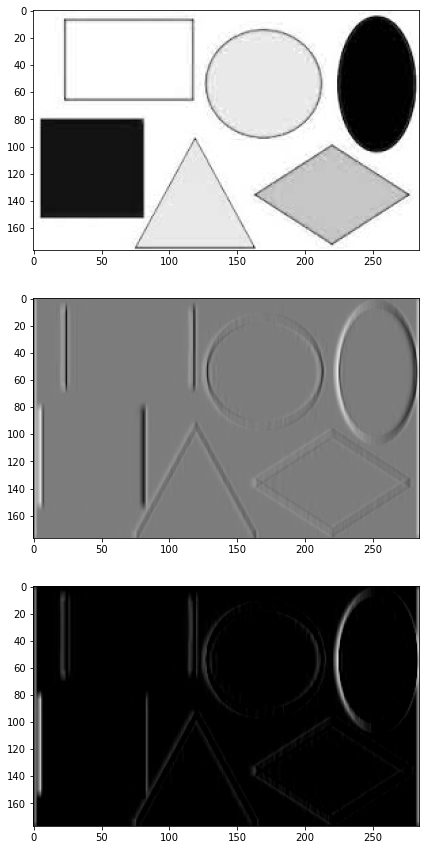

In [46]:
pix = image.load()
arr = np.array([[pix[x, y][0] for x in range(a)] for y in range(b)])
k = np.ones((7,7))
k *= -1
for i in range(7):
    k[i,4] = 6
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))
result = ndimage.convolve(arr, k, mode='constant', cval=0.0)
result2 = np.zeros(result.shape)
# result2 = result[result>0]

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if result[i,j] > 0:
            result2[i,j] = result[i,j]
            

            
plt.gray()
ax1.imshow(arr)
ax2.imshow(result)
ax3.imshow(result2)
plt.show()
# fig.savefig('Data/result.jpg')


In [7]:
result2

array([[   0., 2032., 1016., ..., 1014., 2034., 3051.],
       [   0., 2540., 1270., ..., 1269., 2544., 3816.],
       [   0., 3048., 1524., ..., 1524., 3054., 4581.],
       ...,
       [   0., 3060., 1530., ..., 1530., 3060., 4590.],
       [   0., 2550., 1275., ..., 1275., 2550., 3825.],
       [   0., 2040., 1020., ..., 1020., 2040., 3060.]])

In [20]:
result2[40:45,50:55] #black area

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [19]:
np.amax(result2)

7513.0

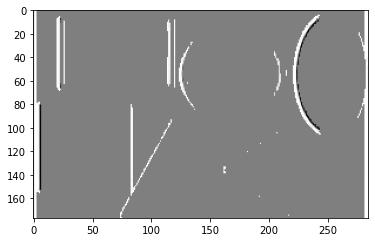

In [51]:
fig, ax1 = plt.subplots(1, 1, figsize=None)
for i in range(result2.shape[0]):
    for j in range(result2.shape[1]):
        if result2[i,j] < 900:
            arr[i,j] = 255/2
ax1.imshow(arr)
plt.show()

In [40]:
arr

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])